In [26]:
from sklearn.datasets.samples_generator import make_blobs
from random import *
import pandas as pd
import numpy as np

centers = []
for i in range(5):
    x = randint(-10, 10)
    y = randint(-10, 10)
    z = randint(-10, 10)
    centers.append([x, y, z])

X, y = make_blobs(n_samples=5000, n_features=3, centers=centers, cluster_std=0.8, center_box=(1, 10.0), shuffle=True, random_state=0)

print(X[:, 0])
print(y)

[-0.92729148 -0.65176688  3.74756657 ... -1.25359577  7.22940649
  3.60781552]
[4 1 3 ... 0 2 3]


In [27]:
import matplotlib.pyplot as plt

#set colors for the clusters
colors = ['r','g','b','c','k','y','m']
c = []
for i in y:
    c.append(colors[i])
    


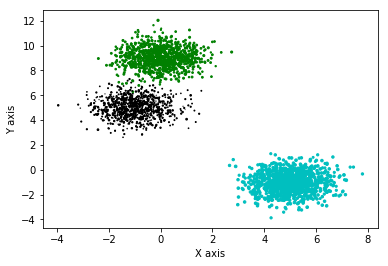

In [29]:
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c= c)
plt.gray()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

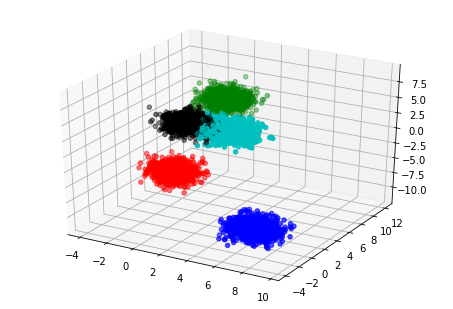

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = c)
pyplot.show()

In [31]:
ward = []
def read_file(file_name):
    array = []
    with open(file_name, 'r') as f:
        content = f.readline()
        print(content)
        for i in range(4):
            content = f.readline()
            content = content.split(' ')
            #print(content[1])
            array.append(float(content[1]))
        for i in range(4):
            content = f.readline()
            content = content.split(' ')
            #print(content[1])
            ward.append(float(content[1]))
    return array
    
result_25_16_5 = './results/result25_16_5.txt'
result_400_16_128 = './results/result400_16_128.txt'

approx_25 = read_file(result_25_16_5)
approx_400 = read_file(result_400_16_128)



    

epsilon 0.25 16 5

epsilon 0.400 16 128



In [32]:
data = {
   'Iris':   [ward[0], approx_25[0], approx_400[0]],
   'Cancer': [ward[1], approx_25[1], approx_400[1]],
   'Digits': [ward[2], approx_25[2], approx_400[2]],
   'Boston': [ward[3], approx_25[3], approx_400[3]]}   
index= ['Ward', 'App-Ward (e = 0.5, VL = 5)', 'App-Ward (e = 4, VL = 128)']

df = pd.DataFrame(data, index)
    
df.head()

,Iris,Cancer,Digits,Boston
Ward,0.675712,0.457046,0.818005,0.796541
"App-Ward (e = 0.5, VL = 5)",0.619183,0.535426,0.794620,0.798001
"App-Ward (e = 4, VL = 128)",0.759643,0.472755,0.564707,0.784764
